# Problem description

To a large degree, financial data has traditionally been numeric in format.

But in recent years, non-numeric formats like image, text and audio have been introduced.  

Private companies have satellites orbiting the Earth taking photos and offering them to customers.  A financial analyst might be able to extract information from these photos that could aid in the prediction of the future price of a stock

- Approximate number of customers visiting each store: count number of cars in parking lot
- Approximate activity in a factory by counting number of supplier trucks arriving and number of delivery trucks leaving
- Approximate demand for a commodity at each location: count cargo ships traveling between ports

In this assignment, we will attempt to recognize ships in satellite photos.
This would be a first step toward
counting.

As in any other domain: specific knowledge of the problem area will make you a better analyst.
For this assignment, we will ignore domain-specific information and just try to use a labeled training set (photo plus a binary indicator for whether a ship is present/absent in the photo), assuming that the labels are perfect.



## Goal: 

In this notebook, you will need to create a model in `sklearn` to classify satellite photos.
- The features are images: 3 dimensional collection of pixels
  - 2 spatial dimensions
  - 1 dimension with 3 features for different parts of the color spectrum: Red, Green, Blue
- The labels are either 1 (ship is present) or 0 (ship is not present)


## Learning objectives
- Learn how to implement a model to solve a Classification task


## How to report your answers
We will mix explanation of the topic with tasks that you must complete. 

- Look for the string "**Question**" to find a task that you must perform.
- Place your code below the following sentence
    > `### YOUR CODE HERE`

# Imports modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

In [2]:
## Load the helper module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.Helper()

# API for students

We have defined some utility routines in a file `helper.py`. There is a class named `Helper` in it.  

This will simplify problem solving

More importantly: it adds structure to your submission so that it may be easily graded

`helper = helper.Helper()`

- getData: Get a collection of labeled images, used as follows

  >`data, labels = helper.getData()`
- showData: Visualize labelled images, used as follows

  >`helper.showData(data, labels)`
- model_interpretation: Visualize the model parameters
  
  >`helper.model_interpretation(Classifier)`

# Get the data

The first step in our Recipe is Get the Data.

We have provided a utility method `getData` to simplify this for you

In [3]:
# Get the data
data, labels = helper.getData()
n_samples, width, height, channel = data.shape

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Data shape:  (4000, 80, 80, 3)
Labels shape:  (4000,)
Label values:  [0 1]


Your expected outputs should be following      
`Date shape: (4000, 80, 80, 3)`           
`Labels shape: (4000,)`       
`Label values: [0 1]`        

We will shuffle the examples before doing anything else.

This is usually a good idea
- Many datasets are naturally arranged in a *non-random* order, e.g., examples with the sample label grouped together
- You want to make sure that, when you split the examples into training and test examples, each split has a similar distribution of examples

In [4]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

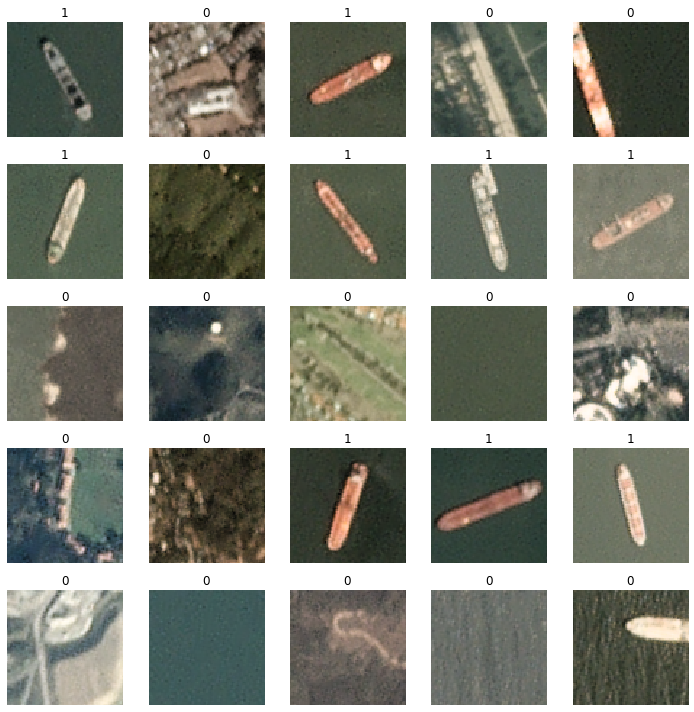

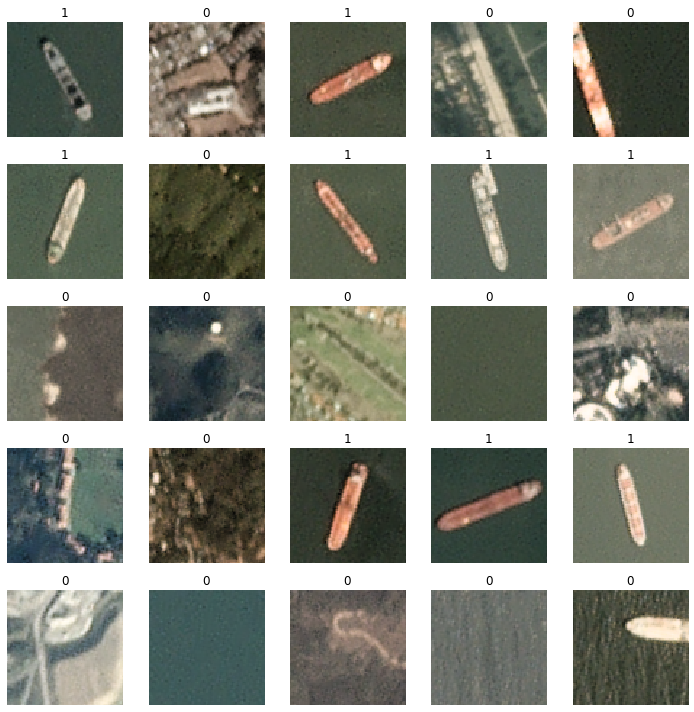

In [5]:
# Visualize the data samples
helper.showData(data[:25], labels[:25])

## Eliminate the color dimension

As a simplification, we will convert the image from color (RGB, with 3 "color" dimensions referred to as Red, Green and Blue) to gray scale.


In [6]:
print("Original shape of data: ", data.shape)

w = (.299, .587, .114)
data_bw = np.sum(data *w, axis=3)

print("New shape of data: ", data_bw.shape)

Original shape of data:  (4000, 80, 80, 3)
New shape of data:  (4000, 80, 80)


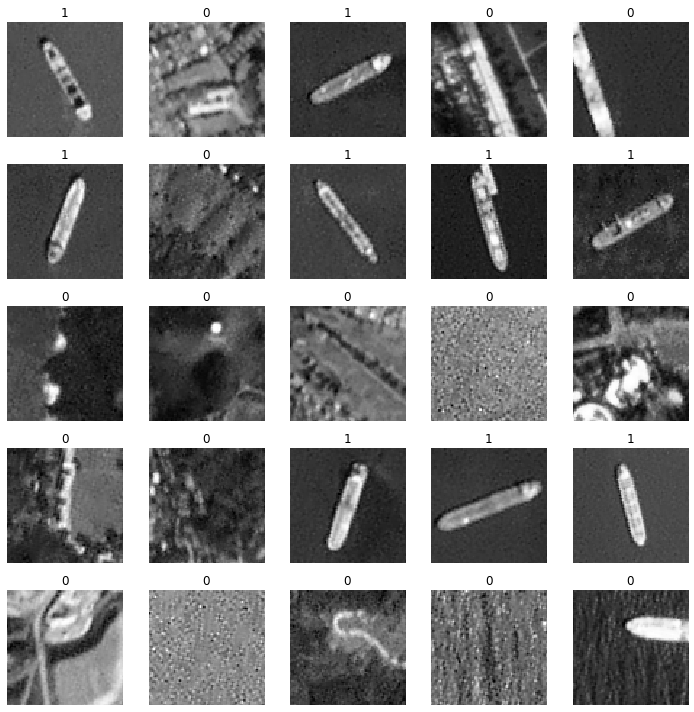

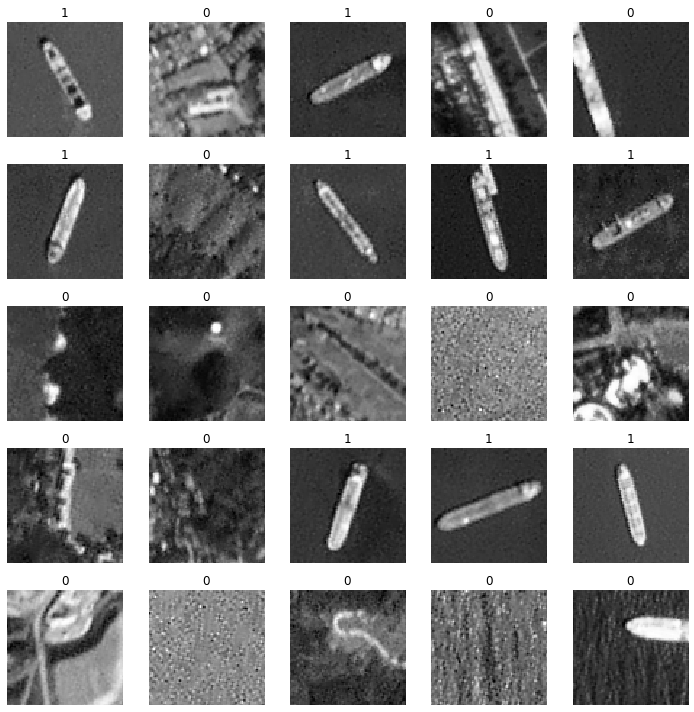

In [7]:
# Visualize the data samples
helper.showData(data_bw[:25], labels[:25], cmap="gray")

## Have  look at the data: Examine the image/label pairs

Rather than viewing the examples in random order, let's group them by label.

Perhaps we will learn something about the characteristics of images that contain ships.

We have loaded and shuffled our dataset, now we will take a look at image/label pairs. 

Feel free to explore the data using your own ideas and techniques.


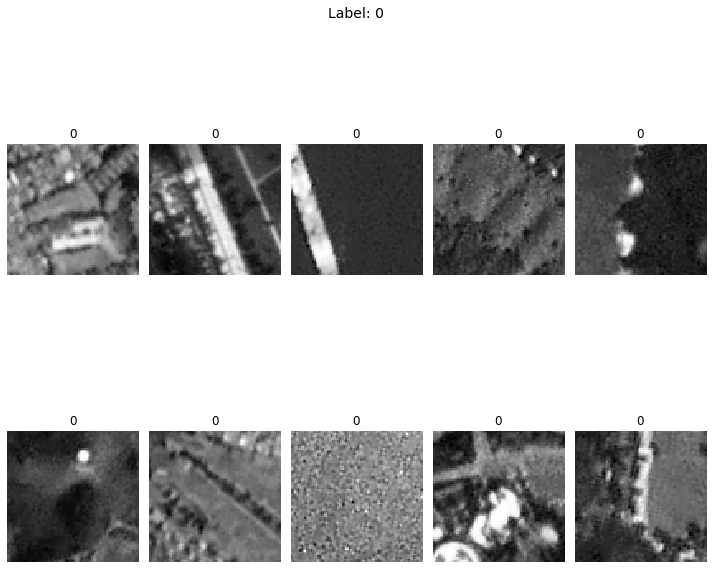

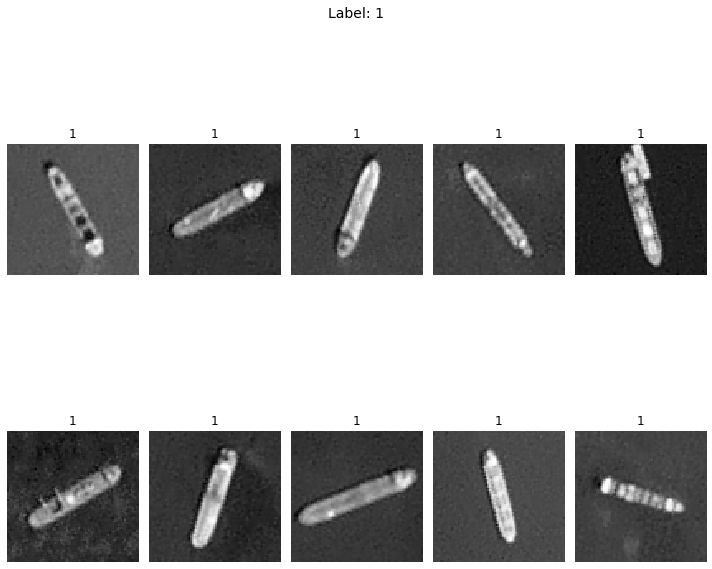

In [8]:
# Inspect some data (images)
num_each_label = 10

for lab in np.unique(labels):
    # Fetch images with different labels
    X_lab, y_lab = data_bw[ labels == lab ], labels[ labels == lab]
    # Display images
    fig = helper.showData( X_lab[:num_each_label], [ str(label) for label in y_lab[:num_each_label] ], cmap="gray")
    _= fig.suptitle("Label: "+  str(lab), fontsize=14)
    _= fig.show()
    print("\n\n")


It appears that a photo is labeled as having a ship present only if the ship is in the **center** of the photo. 

Perhaps this prevents us from double-counting.

In any event: we have learned something about the examples that may help us in building models
- Perhaps there is some feature engineering that we can perform to better enable classification

## Create a test set

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

**Question:**

Split the data
- Set `X_train`, `X_test`, `y_train` and `y_tests` to match the description in the comment
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples

**Hint:**
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42

We will help you by
- Assigning the feature vectors to X and the labels to y
- Flattening the two dimensional spatial dimensions of the features to a single dimension

In [9]:
from sklearn.model_selection import train_test_split

y = labels
X = data_bw

# Flatten X
X = X.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables 
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples
X_train = None
X_test = None
y_train = None
y_test = None

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### END SOLUTION

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3600, 6400)
X_test shape:  (400, 6400)
y_train shape:  (3600,)
y_test shape:  (400,)


Your expected outputs should be following        
`X_train shape:  (3600, 6400)`      
`X_test shape:  (400, 6400)`      
`y_train shape:  (3600,)`       
`y_test shape:  (400,)`      


In [10]:
### BEGIN HIDDEN TESTS
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.10, random_state=42)
assert np.allclose([X_train_], [X_train])
assert np.allclose([y_train_], [y_train])
### END HIDDEN TESTS

# Prepare the data and Classifier

**Questions:**

You will transform the data and create a Classifier.

The requirements are as follows:

- Transform the features (i.e., the pixel grids) into standardized values (mean 0, unit standard deviation)
    - Set a variable `scaler` to be your scaler
- Create a `sklearn` Classifier
    - Set a variable `clf` to be be your Classifier object
    - We recommend trying Logistic Regression first
        - `sklearn`'s implementation of Logistic Regression has many parameter choices
        - We recommend starting with the single parameter `solver="liblinear"`
        - You may want to use the `sklearn` manual to learn about the other parameters

**Hints:**

- Look up `StandardScaler` in `sklearn`; this is a transformation to create standardized values
- You will use transformed examples both for training and test examples
    - So be sure that you can perform the transformation on both sets of examples
- You can use `Pipeline` in `sklearn`, whose last element is a model, is a very convenient way to
    - Implement transformations and perform model fitting/prediction
    - In a way that ensures that all examples, both training and test, are treated consistently
    - Enables Cross Validation without cheating


In [11]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


## Data Scaler
#  Create a StandardScaler object
#    scaler: sklearn standard scaler
scaler = None

### BEGIN SOLUTION
scaler = StandardScaler()
### END SOLUTION


## Classification Model
#  Create a classifier
#    clf: sklearn classifier
#    name: string, name of your classifier
clf = None
name = None

### BEGIN SOLUTION
name = "Logistic Classifier"
train_samples = X_train.shape[0]

# NOTE:
# sklearn LogisticRegression implements several different "solvers"
# 
# - some are faster than solver="liblinear"
# - default "convergence tolerance" is tol=1e-4; this makes the fitting very slow so may want to increase solver
# - C is the equal to 1/(regularization penalty) so controls sparseness of coefficients
# -- increasing the penalty may decrease in-sample fit
# -- Imposing a penalty makes the plot of the parameters as a pixel grid, less "noisy"
# - The following choice of parameters results in fitting 6 times faster than solver="liblinear"
# clf = LogisticRegression(solver='sag',
#                          tol=0.05
#                          C=50. / train_samples,  # n.b. C is 1/(regularization penalty)                     
#                        )

clf = LogisticRegression(solver='liblinear')

preprocess_pipeline = Pipeline(steps=[  ('scaler', scaler) ] )

model_pipeline = Pipeline(steps=[ ("transform", preprocess_pipeline),
                                      ("classify", clf)
                                    ]
                         )
### END SOLUTION

In [12]:
### BEGIN HIDDEN TESTS
assert type(scaler) is sklearn.preprocessing._data.StandardScaler
assert sklearn.base.is_classifier(clf)

### END HIDDEN TESTS

## Train model

**Question:**
- Use your Classifier or model pipeline to train your dataset and compute the in-sample accuracy
    - Set a variable `score_in_sample` to store the in-sample accuracy 

**Hint:**
- The `sklearn` function `accuracy_score` may be helpful


In [13]:
from sklearn.metrics import accuracy_score
# Set variable
# score_in_sample: a scalar number, score for your in-sample examples
score_in_sample = None

### BEGIN SOLUTION
t0 = time.time()

_ = model_pipeline.fit(X_train, y_train)
score_in_sample = accuracy_score(model_pipeline.predict(X_train), y_train)

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
### END SOLUTION

print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

Example run in 32.584 s
Model: Logistic Classifier in sample score=1.00



In [14]:
### BEGIN HIDDEN TESTS
assert score_in_sample > 0.8
### END HIDDEN TESTS

## Train the model using Cross Validation

Since we only have one test set, we want to use 5-fold cross validation check model performance.

**Question:**
- Compute the average score of 5-fold cross validation
    - Set `cross_val_scores` as your scores of k-fold results
    - Set `k` as the number of folds
    - Report the average score


**Hint:**
- `cross_val_score` in `sklearn` will be useful


In [15]:
# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
cross_val_scores = None
k = 5

t0 = time.time()

### BEGIN SOLUTION

t0 = time.time()
    
# Cross validation on the combined pipeline
cross_val_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k)

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

### END SOLUTION

print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores.mean()) )

Example run in 117.186 s
Model: Logistic Classifier avg cross validation score=0.87



In [16]:
### BEGIN HIDDEN TESTS
assert len(cross_val_scores) == 5
assert cross_val_scores.mean() > 0.8
### END HIDDEN TESTS

# How many parameters in the model ?

**Question:** 

- Calculate the number of parameters in your model. Report only the number of *non-intercept* parameters. 
   - Set `num_parameters` to store the number of parameters

**Hint:** 

- The model object may have a method to help you ! Remember that Jupyter can help you find the methods that an object implements.


In [22]:
# Set Variable
#  num_parameters: the number of non-intercept parameters in the model
num_parameters = None

### BEGIN SOLUTION

# The coefficients
clf = model_pipeline["classify"]
num_parameters = clf.coef_[0].shape

### END SOLUTION

print("Shape of intercept: {i}; shape of coefficients: {c}".format(i=clf.intercept_.shape,
                                                                   c=num_parameters) )

Shape of intercept: (1,); shape of coefficients: (6400,)


In [18]:
### BEGIN HIDDEN TESTS
assert num_parameters == clf.coef_[0].shape
### END HIDDEN TESTS

# Evaluate the model

**Question:**

We have trained our model. We now need to  evaluate the model using the test dataset created in an earlier cell.

Please store the model accuracy on the test set in a variable named `score_out_of_sample`.   

**Hint:**
- If you have transformed examples for training, you must perform the *same* transformation for test examples !

- Remember: you *fit* the transformations only on the training examples, not on the test examples !

In [19]:
# Set variable 
#  score_out_of_sample: the model accuracy on the test set
score_out_of_sample = None

### BEGIN SOLUTION
from sklearn.metrics import accuracy_score

y_test_pred = model_pipeline.predict(X_test)
score_out_of_sample = accuracy_score(y_test, y_test_pred)

### END SOLUTION

print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample))

Model: Logistic Classifier out-of-sample score=0.85



In [20]:
### BEGIN HIDDEN TESTS
assert score_out_of_sample > 0.8
### END HIDDEN TESTS

# Visualize the parameters

Remember: there is a one-to-one association between parameters and input features (pixels).

So we can arrange the parameters into the same two dimensional grid structure as images.

This might tell us what "pattern" of features the model is trying to match.

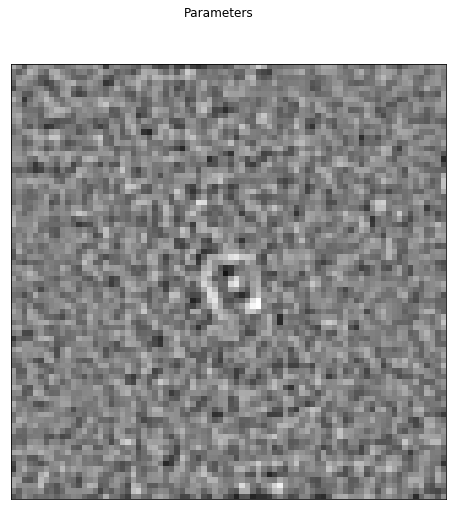

In [21]:
helper.model_interpretation(clf)

# Further Exploration (Optional)
Now you can build your own model using what you have learned from the course. Some ideas to try:
- Was it a good idea to drop the "color" dimension by converting the 3 color channels to a single one ?
- Can you interpret the coefficients of the model ?  Is there a discernible "pattern" being matched ?
- Feature engineering !
    - Come up with some ideas for features that may be predictive, e.g, patterns of pixels
    - Test them
- Use Error Analysis to guide your feature engineering
- Add a *regularization penalty* to your loss function
    - How does this affect
        - The in-sample fit ?
        - The visualization of the parameters
    - **Hint**: The `sklearn` `LogisticRegression` model
        - has several choices for the `penalty` parameter
        - has a variable value for the regularization strength parameter `C`

Observe the effect of each change on the Loss and Accuracy.


# Now Submit your assignment!
Please click on the blue button <span style="color: blue;"> **Submit** </span> in this notebook. 